In [1]:
pip install alpha_vantage pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
from alpha_vantage.techindicators import TechIndicators
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt 
import sys
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import accuracy_score







In [4]:
# Obtaining stock data from alpha vantage 
sym='AAPL'


# funtion to obtain data from alpha vantage API
def stock_data(sym, date_of_data):
    ts = TimeSeries(key='SUXOFAIGXM6HEP9Y', output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    data_date_changed = data[:date_of_data]
    data_date_changed['Ticker']= sym
    return data_date_changed

In [5]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['date'], y = df[i], name = i)
  fig.show()

In [6]:
data_dated= stock_data(sym,'2015-01-01')

<ipython-input-4-389ba0d25671>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_date_changed['Ticker']= sym


In [7]:
data_dated.head(10)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker
date,,,,,,,,,
2021-03-29,121.65,122.5800,120.7299,121.39,121.39,80520010.0,0.0,1.0,AAPL
2021-03-26,120.35,121.4800,118.9200,121.21,121.21,94071234.0,0.0,1.0,AAPL
2021-03-25,119.54,121.6600,119.0000,120.59,120.59,98844681.0,0.0,1.0,AAPL
2021-03-24,122.82,122.9000,120.0650,120.09,120.09,88530485.0,0.0,1.0,AAPL
2021-03-23,123.33,124.2400,122.1400,122.54,122.54,95467142.0,0.0,1.0,AAPL
2021-03-22,120.33,123.8700,120.2600,123.39,123.39,111912284.0,0.0,1.0,AAPL
2021-03-19,119.90,121.4300,119.6750,119.99,119.99,185549522.0,0.0,1.0,AAPL
2021-03-18,122.88,123.1800,120.3200,120.53,120.53,121469755.0,0.0,1.0,AAPL
2021-03-17,124.05,125.8599,122.3360,124.76,124.76,111932636.0,0.0,1.0,AAPL


In [8]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['4. close']].shift(-n)
  
  # return the new dataset 
  return data

In [9]:
df=data_dated.copy()

In [10]:
data_dated['change_in_price'] = data_dated['4. close'].diff()

In [11]:
data_dated

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,change_in_price
date,,,,,,,,,,
2021-03-29,121.65,122.58,120.7299,121.39,121.390000,80520010.0,0.0,1.0,AAPL,NaN
2021-03-26,120.35,121.48,118.9200,121.21,121.210000,94071234.0,0.0,1.0,AAPL,-0.18
2021-03-25,119.54,121.66,119.0000,120.59,120.590000,98844681.0,0.0,1.0,AAPL,-0.62
2021-03-24,122.82,122.90,120.0650,120.09,120.090000,88530485.0,0.0,1.0,AAPL,-0.50
2021-03-23,123.33,124.24,122.1400,122.54,122.540000,95467142.0,0.0,1.0,AAPL,2.45
...,...,...,...,...,...,...,...,...,...,...
2015-01-08,109.23,112.15,108.7000,111.89,25.441309,59364547.0,0.0,1.0,AAPL,-0.12
2015-01-07,107.20,108.20,106.6950,107.75,24.499965,40105934.0,0.0,1.0,AAPL,-4.14
2015-01-06,106.54,107.43,104.6300,106.26,24.161172,65797116.0,0.0,1.0,AAPL,-1.49


In [12]:
# Calculate the Stochastic Oscillator
n = 14

# Make a copy of the high and low column.
low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((data_dated['4. close'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
data_dated['low_14'] = low_14
data_dated['high_14'] = high_14
data_dated['k_percent'] = k_percent

# Display the head.
data_dated.head(5)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,change_in_price,low_14,high_14,k_percent
date,,,,,,,,,,,,,
2021-03-29,121.65,122.58,120.7299,121.39,121.39,80520010.0,0.0,1.0,AAPL,NaN,NaN,NaN,NaN
2021-03-26,120.35,121.48,118.9200,121.21,121.21,94071234.0,0.0,1.0,AAPL,-0.18,NaN,NaN,NaN
2021-03-25,119.54,121.66,119.0000,120.59,120.59,98844681.0,0.0,1.0,AAPL,-0.62,NaN,NaN,NaN
2021-03-24,122.82,122.90,120.0650,120.09,120.09,88530485.0,0.0,1.0,AAPL,-0.50,NaN,NaN,NaN
2021-03-23,123.33,124.24,122.1400,122.54,122.54,95467142.0,0.0,1.0,AAPL,2.45,NaN,NaN,NaN


In [13]:
# Calculate the Williams %R
n = 14

# Make a copy of the high and low column.
low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

# Calculate William %R indicator.
r_percent = ((high_14 - data_dated['4. close']) / (high_14 - low_14)) * - 100

# Add the info to the data frame.
data_dated['r_percent'] = r_percent

# Display the head.
data_dated.head(5)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,change_in_price,low_14,high_14,k_percent,r_percent
date,,,,,,,,,,,,,,
2021-03-29,121.65,122.58,120.7299,121.39,121.39,80520010.0,0.0,1.0,AAPL,NaN,NaN,NaN,NaN,NaN
2021-03-26,120.35,121.48,118.9200,121.21,121.21,94071234.0,0.0,1.0,AAPL,-0.18,NaN,NaN,NaN,NaN
2021-03-25,119.54,121.66,119.0000,120.59,120.59,98844681.0,0.0,1.0,AAPL,-0.62,NaN,NaN,NaN,NaN
2021-03-24,122.82,122.90,120.0650,120.09,120.09,88530485.0,0.0,1.0,AAPL,-0.50,NaN,NaN,NaN,NaN
2021-03-23,123.33,124.24,122.1400,122.54,122.54,95467142.0,0.0,1.0,AAPL,2.45,NaN,NaN,NaN,NaN


In [14]:
# Calculate the MACD
ema_26 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
data_dated['MACD'] = macd
data_dated['MACD_EMA'] = ema_9_macd

# Print the head.
data_dated.head(5)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,change_in_price,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA
date,,,,,,,,,,,,,,,,
2021-03-29,121.65,122.58,120.7299,121.39,121.39,80520010.0,0.0,1.0,AAPL,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2021-03-26,120.35,121.48,118.9200,121.21,121.21,94071234.0,0.0,1.0,AAPL,-0.18,NaN,NaN,NaN,NaN,-0.004038,-0.002244
2021-03-25,119.54,121.66,119.0000,120.59,120.59,98844681.0,0.0,1.0,AAPL,-0.62,NaN,NaN,NaN,NaN,-0.024372,-0.011313
2021-03-24,122.82,122.90,120.0650,120.09,120.09,88530485.0,0.0,1.0,AAPL,-0.50,NaN,NaN,NaN,NaN,-0.051075,-0.024782
2021-03-23,123.33,124.24,122.1400,122.54,122.54,95467142.0,0.0,1.0,AAPL,2.45,NaN,NaN,NaN,NaN,0.032981,-0.007599


In [15]:
# Calculate the Price Rate of Change
n = 9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
data_dated['Price_Rate_Of_Change'] = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.pct_change(periods = n))

# Print the first 30 rows
data_dated.head(5)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,change_in_price,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA,Price_Rate_Of_Change
date,,,,,,,,,,,,,,,,,
2021-03-29,121.65,122.58,120.7299,121.39,121.39,80520010.0,0.0,1.0,AAPL,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
2021-03-26,120.35,121.48,118.9200,121.21,121.21,94071234.0,0.0,1.0,AAPL,-0.18,NaN,NaN,NaN,NaN,-0.004038,-0.002244,NaN
2021-03-25,119.54,121.66,119.0000,120.59,120.59,98844681.0,0.0,1.0,AAPL,-0.62,NaN,NaN,NaN,NaN,-0.024372,-0.011313,NaN
2021-03-24,122.82,122.90,120.0650,120.09,120.09,88530485.0,0.0,1.0,AAPL,-0.50,NaN,NaN,NaN,NaN,-0.051075,-0.024782,NaN
2021-03-23,123.33,124.24,122.1400,122.54,122.54,95467142.0,0.0,1.0,AAPL,2.45,NaN,NaN,NaN,NaN,0.032981,-0.007599,NaN


In [16]:
data_dated = trading_window(data_dated)

In [17]:
data_dated = data_dated[:-1]

In [18]:
data_dated.reset_index(inplace = True) 

In [19]:
data_dated.drop(['Ticker','2. high','3. low', '4. close', '5. adjusted close', '7. dividend amount', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True) 

/Users/aesthetic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df_lstm=data_dated.copy()
df_RandomForest=data_dated.copy()

In [21]:
data_dated.head(10)

,date,1. open,6. volume,change_in_price,k_percent,r_percent,MACD,Price_Rate_Of_Change,Target
0,2021-03-29,121.65,80520010.0,NaN,NaN,NaN,0.000000,NaN,121.21
1,2021-03-26,120.35,94071234.0,-0.18,NaN,NaN,-0.004038,NaN,120.59
2,2021-03-25,119.54,98844681.0,-0.62,NaN,NaN,-0.024372,NaN,120.09
3,2021-03-24,122.82,88530485.0,-0.50,NaN,NaN,-0.051075,NaN,122.54
4,2021-03-23,123.33,95467142.0,2.45,NaN,NaN,0.032981,NaN,123.39
5,2021-03-22,120.33,111912284.0,0.85,NaN,NaN,0.119237,NaN,119.99
6,2021-03-19,119.90,185549522.0,-3.40,NaN,NaN,0.018474,NaN,120.53
7,2021-03-18,122.88,121469755.0,0.54,NaN,NaN,-0.023705,NaN,124.76
8,2021-03-17,124.05,111932636.0,4.23,NaN,NaN,0.157313,NaN,125.57
9,2021-03-16,125.70,115227936.0,0.81,NaN,NaN,0.325156,0.034434,123.99


In [22]:
# Any row that has a `NaN` value will be dropped.
data_dated = data_dated.dropna()

In [23]:
cv = KFold(n_splits=10, random_state=None, shuffle=False)
sc = MinMaxScaler(feature_range = (0, 1))

In [24]:
X = data_dated.iloc[:, :-1]
y = data_dated.iloc[:, -1]

In [25]:
cv.split(X)

<generator object _BaseKFold.split at 0x7feb76834120>

In [26]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [27]:
df_lstm=df_lstm.reset_index()

In [28]:

regression_model = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)

 
Accuracy for Split 1
0.9021509004419545
MSE: 0.006134153233232791
RMSE: 0.07832083524345736
Rsquared 0.9021509004419545
MAE: 0.02274192517031168
 
 
Accuracy for Split 2
0.9795658952400728
MSE: 0.0009358112687729434
RMSE: 0.03059103248948854
Rsquared 0.9795658952400728
MAE: 0.02176371474495632
 
 
Accuracy for Split 3
0.9928345645948891
MSE: 0.00047718984222862765
RMSE: 0.021844675374759582
Rsquared 0.9928345645948891
MAE: 0.01698591472143807
 
 
Accuracy for Split 4
0.9812200936973359
MSE: 0.0011197441519678424
RMSE: 0.03346257838194544
Rsquared 0.9812200936973359
MAE: 0.022552748382703977
 
 
Accuracy for Split 5
0.9915431636174603
MSE: 0.0006397030553439346
RMSE: 0.025292351716357547
Rsquared 0.9915431636174603
MAE: 0.017774799727300873
 
 
Accuracy for Split 6
0.9767955751637907
MSE: 0.001565142510231464
RMSE: 0.039561882036013706
Rsquared 0.9767955751637907
MAE: 0.024081254282538513
 
 
Accuracy for Split 7
0.9956959152804353
MSE: 0.00037675164797863883
RMSE: 0.01941009139542209

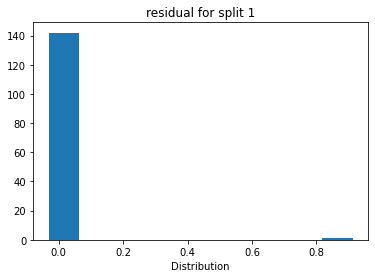

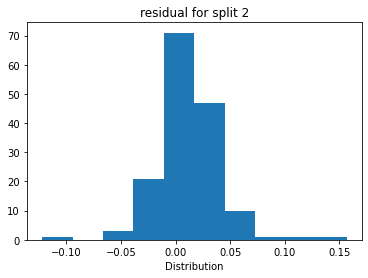

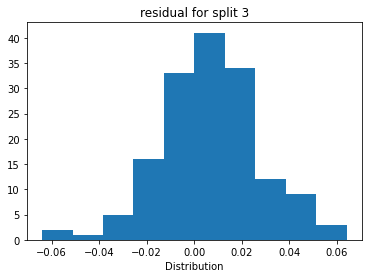

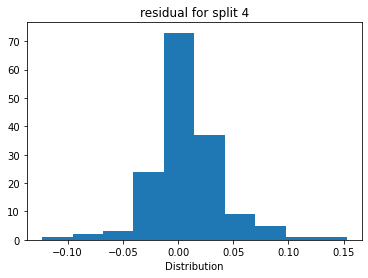

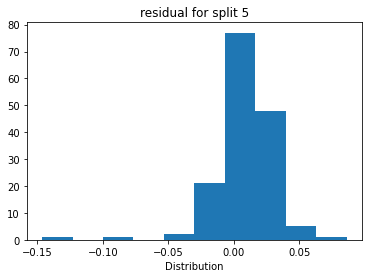

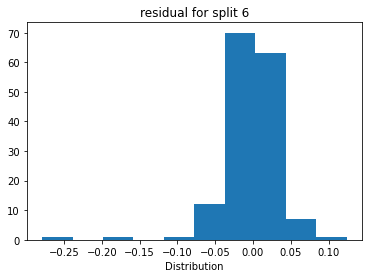

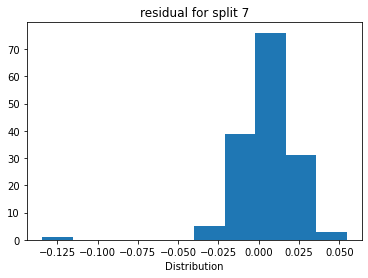

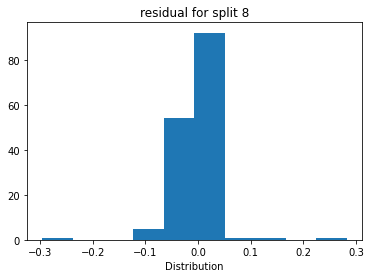

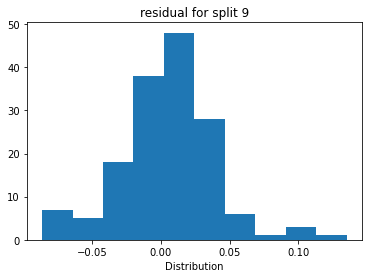

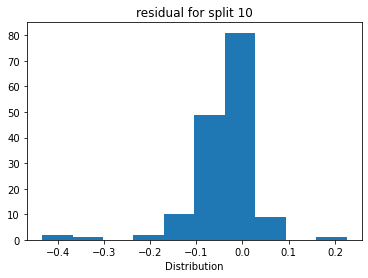

In [29]:
accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

p=1


for train_index, test_index in cv.split(X):
    X_train, X_test =X.reindex(train_index), X.reindex(test_index)
    y_train, y_test = y.reindex(train_index), y.reindex(test_index).reset_index(drop=True)
    y_train = y_train.dropna()
    X_train = X_train.dropna()
    y_test = y_test.dropna()
    X_test = X_test.dropna()
    
    

    X_train= sc.fit_transform(X_train.iloc[:, 1:])  
    X_test= sc.fit_transform(X_test.iloc[:, 1:])  
    y_train=sc.fit_transform(y_train.values.reshape(-1,1)) 
    y_test= sc.fit_transform(y_test.values.reshape(-1, 1)) 

    
    regression_model.fit(X_train, y_train)
    print(" ")
    print('Accuracy for Split '+ str(p))
    print(regression_model.score(X_test, y_test))
    accuracy_scores.append(regression_model.score(X_test, y_test))

    pred = regression_model.predict(X_test)
    residual= y_test-pred
   
    fig, ax = plt.subplots()
    ax.hist( residual)
    print('MSE: ' +str(mean_squared_error(y_test, pred)))
    mse.append(mean_squared_error(y_test, pred))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test, pred))))
    rmse.append(math.sqrt(mean_squared_error(y_test, pred)))
    print('Rsquared '+ str(r2_score(y_test, pred)))
    rsquared.append(r2_score(y_test, pred))
    print('MAE: ' + str(mean_absolute_error(y_test, pred)))
    mae.append(mean_absolute_error(y_test, pred))
    print(" ")
 
    ax.set_title('residual for split ' + str(p))
    ax.set_xlabel("Distribution")
    p +=1
    
    
    
    
    
    
accuracy_avg= np.mean(accuracy_scores)
print('Average Accuracy ='+ str(accuracy_avg))

mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))

rmse_avg= np.mean(rmse)
print('Average RMSE ='+ str(rmse_avg))

rsquared_avg= np.mean(rsquared)
print('Average Rsquared =' + str(rsquared_avg))

mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))

    


In [30]:
X

,date,1. open,6. volume,change_in_price,k_percent,r_percent,MACD,Price_Rate_Of_Change
13,2021-03-10,121.69,111943326.0,-1.980,12.771084,-87.228916,-0.002007,-0.020891
14,2021-03-09,119.03,129525780.0,1.105,27.224199,-72.775801,-0.056555,-0.018681
15,2021-03-08,120.93,154376610.0,-4.725,1.362398,-98.637602,-0.383804,-0.030253
16,2021-03-05,120.98,153766601.0,5.060,47.320618,-52.679382,-0.315479,0.007384
17,2021-03-04,121.75,178154975.0,-1.290,35.603996,-64.396004,-0.340614,-0.037111
...,...,...,...,...,...,...,...,...
1564,2015-01-09,112.67,53315099.0,2.760,48.677627,-51.322373,-3.783091,-0.008586
1565,2015-01-08,109.23,59364547.0,-0.120,51.780186,-48.219814,-3.449617,-0.004537
1566,2015-01-07,107.20,40105934.0,-4.140,27.830528,-72.169472,-3.479292,-0.016431
1567,2015-01-06,106.54,65797116.0,-1.490,16.747837,-83.252163,-3.581753,-0.022627


# Random Forest Model

In [31]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data


In [32]:
df_RandomForest=df_RandomForest.drop(['date'], axis = 1) 

In [33]:
X_RandomForest = X
y_RandomForest = y

In [34]:
X_RandomForest.head(10)

,date,1. open,6. volume,change_in_price,k_percent,r_percent,MACD,Price_Rate_Of_Change
13,2021-03-10,121.69,111943326.0,-1.980,12.771084,-87.228916,-0.002007,-0.020891
14,2021-03-09,119.03,129525780.0,1.105,27.224199,-72.775801,-0.056555,-0.018681
15,2021-03-08,120.93,154376610.0,-4.725,1.362398,-98.637602,-0.383804,-0.030253
16,2021-03-05,120.98,153766601.0,5.060,47.320618,-52.679382,-0.315479,0.007384
17,2021-03-04,121.75,178154975.0,-1.290,35.603996,-64.396004,-0.340614,-0.037111
18,2021-03-03,124.81,112966340.0,1.930,53.133515,-46.866485,-0.231981,-0.027953
19,2021-03-02,128.41,102260945.0,3.060,71.223022,-28.776978,0.054011,0.009114
20,2021-03-01,123.75,116307892.0,2.670,92.565947,-7.434053,0.450975,0.055854
21,2021-02-26,122.59,163424672.0,-6.530,40.367706,-59.632294,0.314927,-0.005740
22,2021-02-25,124.68,144766924.0,-0.270,38.209432,-61.790568,0.187338,0.008418


 
Accuracy for Split 0:
0.9004581821884762
MSE: 0.006240269622595845
RMSE: 0.07899537722294796
Rsquaed: 0.9004581821884762
MAE: 0.012346028199156941
 
 
Accuracy for Split 1:
0.8790691922931204
MSE: 0.005538212411235306
RMSE: 0.07441916696144418
Rsquaed: 0.8790691922931204
MAE: 0.04186571710416894
 
 
Accuracy for Split 2:
0.9788554869604659
MSE: 0.001408141483508381
RMSE: 0.037525211305312875
Rsquaed: 0.9788554869604659
MAE: 0.024412324574051087
 
 
Accuracy for Split 3:
0.9700942986903364
MSE: 0.0017831150812100956
RMSE: 0.04222694733473041
Rsquaed: 0.9700942986903364
MAE: 0.02991815483975402
 
 
Accuracy for Split 4:
0.9651936825472086
MSE: 0.0026328648932823265
RMSE: 0.05131144992379699
Rsquaed: 0.9651936825472086
MAE: 0.0287347211674075
 
 
Accuracy for Split 5:
0.9594913649584667
MSE: 0.0027323145125329913
RMSE: 0.05227154591680823
Rsquaed: 0.9594913649584667
MAE: 0.035815755045490186
 
 
Accuracy for Split 6:
0.9841390110979058
MSE: 0.0013883680496045894
RMSE: 0.0372608111774903

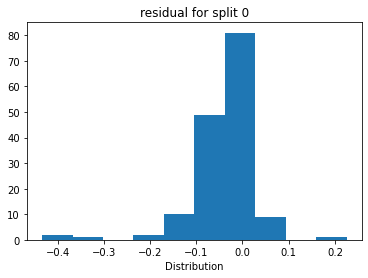

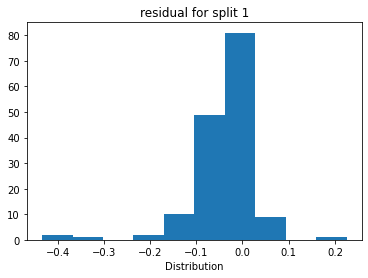

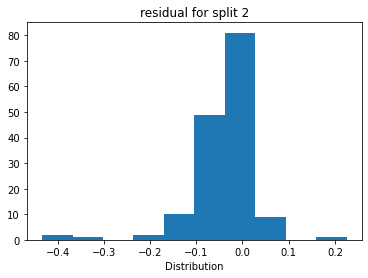

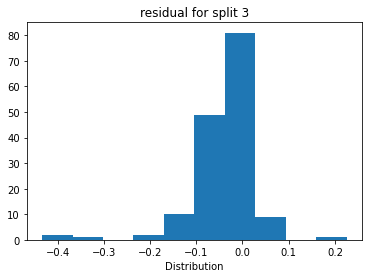

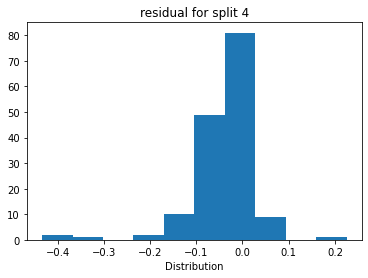

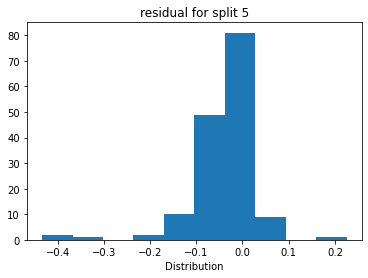

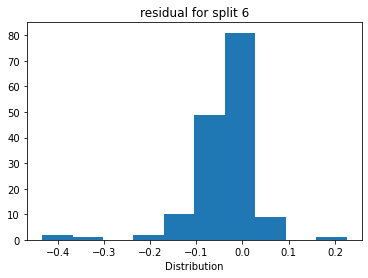

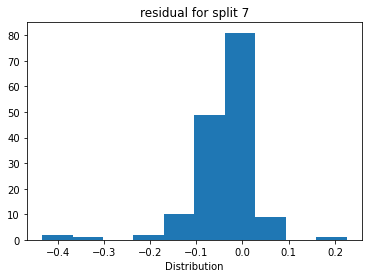

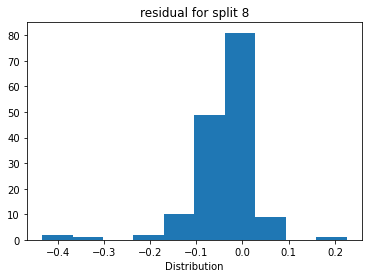

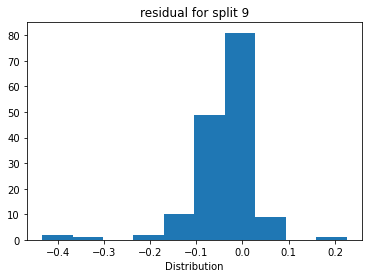

In [35]:
accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

p=0

for train_index, test_index in cv.split(X):
    
    X_train_RandomForest, X_test_RandomForest =X_RandomForest.reindex(train_index), X_RandomForest.reindex(test_index)
    y_train_RandomForest, y_test_RandomForest = y_RandomForest.reindex(train_index), y_RandomForest.reindex(test_index).reset_index(drop=True)

    
    X_train_RandomForest = X_train_RandomForest.dropna()
    X_test_RandomForest = X_test_RandomForest.dropna()
    y_train_RandomForest = y_train_RandomForest.dropna()
    y_test_RandomForest = y_test_RandomForest.dropna()
    
    X_train_RandomForest= sc.fit_transform(X_train_RandomForest.iloc[:, 1:])  
    X_test_RandomForest= sc.fit_transform(X_test_RandomForest.iloc[:, 1:])  
    y_train_RandomForest=sc.fit_transform(y_train_RandomForest.values.reshape(-1,1)) 
    y_test_RandomForest= sc.fit_transform(y_test_RandomForest.values.reshape(-1, 1))  
    
    
    
    rf.fit(X_train_RandomForest, y_train_RandomForest.ravel())
    
    pred_rf = rf.predict(X_test_RandomForest)
    residual_rf= y_test_RandomForest-pred_rf
    fig, ax = plt.subplots()
    ax.hist( residual)
    print(" ")
    print('Accuracy for Split '+ str(p) + ':')
    # View accuracy score
    print(rf.score(X_test_RandomForest, y_test_RandomForest))
#     # Use the forest's predict method on the test data
    
    print('MSE: ' +str(mean_squared_error(y_test_RandomForest, pred_rf)))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test_RandomForest, pred_rf))))
    print('Rsquaed: '+ str(r2_score(y_test_RandomForest, pred_rf)))
    print('MAE: ' + str(mean_absolute_error(y_test_RandomForest, pred_rf)))
    print(" ")
    ax.set_xlabel("Distribution")
    ax.set_title('residual for split ' + str(p))
    
    p+=1
   
    accuracy_scores.append(rf.score(X_test_RandomForest, y_test_RandomForest))
    mse.append(mean_squared_error(y_test_RandomForest, pred_rf))
    rmse.append(math.sqrt(mean_squared_error(y_test_RandomForest, pred_rf)))
    rsquared.append(r2_score(y_test_RandomForest, pred_rf))
    mae.append(mean_absolute_error(y_test_RandomForest, pred_rf))
    
    
accuracy_avg= np.mean(accuracy_scores)
print('Average Accuracy ='+ str(accuracy_avg))

mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))

rmse_avg= np.mean(rmse)
print('Average RMSE ='+ str(rmse_avg))

rsquared_avg= np.mean(rsquared)
print('Average Rsquared =' + str(rsquared_avg))


mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))






    
   
 

In [36]:
feature_list = list(X.iloc[:, 1:].columns)

importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: 1. open              Importance: 0.98
Variable: 6. volume            Importance: 0.01
Variable: MACD                 Importance: 0.01
Variable: change_in_price      Importance: 0.0
Variable: k_percent            Importance: 0.0
Variable: r_percent            Importance: 0.0
Variable: Price_Rate_Of_Change Importance: 0.0


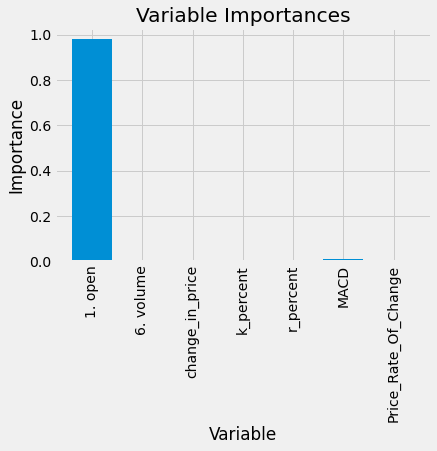

In [37]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# LSTM

In [38]:
X_lstm= X
y_lstm = y

X_lstm.drop(['date'], axis = 1, inplace=True) 
# y_lstm.drop(['date'], axis = 1, inplace=True) 

In [39]:
X_lstm.head(10)

,1. open,6. volume,change_in_price,k_percent,r_percent,MACD,Price_Rate_Of_Change
13,121.69,111943326.0,-1.980,12.771084,-87.228916,-0.002007,-0.020891
14,119.03,129525780.0,1.105,27.224199,-72.775801,-0.056555,-0.018681
15,120.93,154376610.0,-4.725,1.362398,-98.637602,-0.383804,-0.030253
16,120.98,153766601.0,5.060,47.320618,-52.679382,-0.315479,0.007384
17,121.75,178154975.0,-1.290,35.603996,-64.396004,-0.340614,-0.037111
18,124.81,112966340.0,1.930,53.133515,-46.866485,-0.231981,-0.027953
19,128.41,102260945.0,3.060,71.223022,-28.776978,0.054011,0.009114
20,123.75,116307892.0,2.670,92.565947,-7.434053,0.450975,0.055854
21,122.59,163424672.0,-6.530,40.367706,-59.632294,0.314927,-0.005740
22,124.68,144766924.0,-0.270,38.209432,-61.790568,0.187338,0.008418


In [40]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot


accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

for train_index, test_index in cv.split(X_lstm):
    X_train_lstm, X_test_lstm =X_lstm.reindex(train_index), X_lstm.reindex(test_index)
    y_train_lstm, y_test_lstm = y_lstm.reindex(train_index), y_lstm.reindex(test_index).reset_index(drop=True)
    
    
    
    X_train_lstm = X_train_lstm.dropna()
    X_test_lstm = X_test_lstm.dropna()
    y_train_lstm = y_train_lstm.dropna()
    y_test_lstm = y_test_lstm.dropna()
    
    X_train_lstm= sc.fit_transform(X_train_lstm.iloc[:, 1:])  
    X_test_lstm= sc.fit_transform(X_test_lstm.iloc[:, 1:])  
    y_train_lstm=sc.fit_transform(y_train_lstm.values.reshape(-1,1)) 
    y_test_lstm= sc.fit_transform(y_test_lstm.values.reshape(-1, 1))  
    
    
    
    X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
    X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))
    
    inputs = keras.layers.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    x = keras.layers.LSTM(300, return_sequences= True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(300, return_sequences=True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(300)(x)
    outputs = keras.layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss="mse", metrics=['accuracy','mean_squared_error', 'mae', 'mape'])
    model.summary()
    
    histoty=model.fit(
    X_train_lstm, y_train_lstm,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2)
    
    scores = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    accuracy_scores.append(scores[1])
    print("MSE:" + str((scores[2])))
    mse.append(scores[2])
    print("MAE:" + str((scores[3])))
    mae.append(scores[3])
    print('RMSE: ' + str(math.sqrt(scores[2])))
    
    y_pred = model.predict(X_test_lstm)
    
    print('R2 Score: ', r2_score(y_test_lstm, y_pred))
    rsquared.append(r2_score(y_test_lstm, y_pred))
    

#     pyplot.plot(history.history['loss'])
#     pyplot.plot(history.history['val_loss'])
#     pyplot.title('model train vs validation loss')
#     pyplot.ylabel('loss')
#     pyplot.xlabel('epoch')
#     pyplot.legend(['train', 'validation'], loc='upper right')
#     pyplot.show()
    
    


mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))



rsquared_avg= np.mean(rsquared)
print('Average Accuracy ='+ str(rsquared_avg))

# rmse_avg= np.mean(rmse)
# print('Average RMSE ='+ str(scores[1]))

# rsquared_avg= np.mean(rsquared)
# print('Average Rsquared =' + str(rsquared_avg))


mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))
    
#     print('MSE =' + str(history.history['mean_squared_error']))
    # Trai the model
#      y_train_rf, y_test_rf = y.reindex(train_index), y.reindex(test_index).reset_index(drop=True)
    
#     y_train_rf = y_train_rf.dropna()
#     X_train_rf = X_train_rf.dropna()
#     y_test_rf = y_test_rf.dropna()
#     X_test_rf = X_test_rf.dropna()
#     rf.fit(X_train_rf.iloc[:, 1:], y_train_rf)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 6, 300)            362400    
_________________________________________________________________
dropout (Dropout)            (None, 6, 300)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 300)            721200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 300)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense (Dense)                (None, 1)                 301   

35/35 [==============================] - 3s 87ms/step - loss: 0.0374 - accuracy: 1.0144e-04 - mean_squared_error: 0.0374 - mae: 0.1450 - mape: 29047.7867 - val_loss: 0.0326 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0326 - val_mae: 0.1781 - val_mape: 402.3175
Epoch 26/100
35/35 [==============================] - 3s 85ms/step - loss: 0.0350 - accuracy: 8.0190e-04 - mean_squared_error: 0.0350 - mae: 0.1383 - mape: 214509.5349 - val_loss: 0.0328 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0328 - val_mae: 0.1787 - val_mape: 403.4513
Epoch 27/100
35/35 [==============================] - 3s 85ms/step - loss: 0.0363 - accuracy: 5.4480e-04 - mean_squared_error: 0.0363 - mae: 0.1429 - mape: 166137.5502 - val_loss: 0.0215 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0215 - val_mae: 0.1435 - val_mape: 333.2645
Epoch 28/100
35/35 [==============================] - 3s 87ms/step - loss: 0.0374 - accuracy: 1.2857e-04 - mean_squared_error: 0.0374 - mae: 0.1426 - mape: 

Epoch 54/100
35/35 [==============================] - 3s 85ms/step - loss: 0.0355 - accuracy: 0.0014 - mean_squared_error: 0.0355 - mae: 0.1468 - mape: 158157.5360 - val_loss: 0.0449 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0449 - val_mae: 0.2100 - val_mape: 462.8656
Epoch 55/100
35/35 [==============================] - 3s 83ms/step - loss: 0.0340 - accuracy: 4.6187e-04 - mean_squared_error: 0.0340 - mae: 0.1427 - mape: 77631.3339 - val_loss: 0.0315 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0315 - val_mae: 0.1748 - val_mape: 393.2002
Epoch 56/100
35/35 [==============================] - 3s 86ms/step - loss: 0.0326 - accuracy: 0.0014 - mean_squared_error: 0.0326 - mae: 0.1388 - mape: 286163.1048 - val_loss: 0.0345 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0345 - val_mae: 0.1817 - val_mape: 410.5295
Epoch 57/100
35/35 [==============================] - 3s 83ms/step - loss: 0.0317 - accuracy: 0.0021 - mean_squared_error: 0.0317 - mae: 0.1377 - mape:

Epoch 83/100
35/35 [==============================] - 4s 114ms/step - loss: 0.0293 - accuracy: 0.0033 - mean_squared_error: 0.0293 - mae: 0.1336 - mape: 530495.0475 - val_loss: 0.0299 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0299 - val_mae: 0.1657 - val_mape: 382.9500
Epoch 84/100
35/35 [==============================] - 4s 111ms/step - loss: 0.0286 - accuracy: 1.5104e-04 - mean_squared_error: 0.0286 - mae: 0.1286 - mape: 12128.5083 - val_loss: 0.0216 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0216 - val_mae: 0.1419 - val_mape: 329.8921
Epoch 85/100
35/35 [==============================] - 3s 94ms/step - loss: 0.0244 - accuracy: 0.0042 - mean_squared_error: 0.0244 - mae: 0.1194 - mape: 133071.1320 - val_loss: 0.0351 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0351 - val_mae: 0.1745 - val_mape: 403.1356
Epoch 86/100
35/35 [==============================] - 3s 95ms/step - loss: 0.0275 - accuracy: 0.0044 - mean_squared_error: 0.0275 - mae: 0.1267 - map

35/35 [==============================] - 3s 85ms/step - loss: 0.0140 - accuracy: 5.9098e-04 - mean_squared_error: 0.0140 - mae: 0.0902 - mape: 62698.1713 - val_loss: 0.0224 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0224 - val_mae: 0.1459 - val_mape: 363.7679
Epoch 8/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0133 - accuracy: 3.8336e-04 - mean_squared_error: 0.0133 - mae: 0.0900 - mape: 60213.5018 - val_loss: 0.0055 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0055 - val_mae: 0.0697 - val_mape: 199.9134
Epoch 9/100
35/35 [==============================] - 3s 83ms/step - loss: 0.0118 - accuracy: 5.0189e-04 - mean_squared_error: 0.0118 - mae: 0.0855 - mape: 105686.8256 - val_loss: 0.0136 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0136 - val_mae: 0.1131 - val_mape: 296.4277
Epoch 10/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0129 - accuracy: 0.0018 - mean_squared_error: 0.0129 - mae: 0.0876 - mape: 60837.8

Epoch 36/100
35/35 [==============================] - 3s 92ms/step - loss: 0.0124 - accuracy: 7.1483e-04 - mean_squared_error: 0.0124 - mae: 0.0865 - mape: 13723.9239 - val_loss: 0.0123 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0123 - val_mae: 0.1023 - val_mape: 286.9253
Epoch 37/100
35/35 [==============================] - 3s 94ms/step - loss: 0.0112 - accuracy: 0.0017 - mean_squared_error: 0.0112 - mae: 0.0839 - mape: 126196.6327 - val_loss: 0.0154 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0154 - val_mae: 0.1195 - val_mape: 305.6218
Epoch 38/100
35/35 [==============================] - 3s 93ms/step - loss: 0.0115 - accuracy: 0.0015 - mean_squared_error: 0.0115 - mae: 0.0819 - mape: 18212.0167 - val_loss: 0.0132 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0132 - val_mae: 0.1096 - val_mape: 283.9954
Epoch 39/100
35/35 [==============================] - 4s 101ms/step - loss: 0.0122 - accuracy: 0.0013 - mean_squared_error: 0.0122 - mae: 0.0834 - mape:

35/35 [==============================] - 3s 89ms/step - loss: 0.0113 - accuracy: 0.0024 - mean_squared_error: 0.0113 - mae: 0.0815 - mape: 253198.2056 - val_loss: 0.0111 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0111 - val_mae: 0.1003 - val_mape: 267.3265
Epoch 66/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0102 - accuracy: 0.0031 - mean_squared_error: 0.0102 - mae: 0.0797 - mape: 399038.6386 - val_loss: 0.0087 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0087 - val_mae: 0.0879 - val_mape: 246.1697
Epoch 67/100
35/35 [==============================] - 3s 98ms/step - loss: 0.0102 - accuracy: 5.6935e-04 - mean_squared_error: 0.0102 - mae: 0.0786 - mape: 26258.5480 - val_loss: 0.0128 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0128 - val_mae: 0.1068 - val_mape: 274.1593
Epoch 68/100
35/35 [==============================] - 3s 87ms/step - loss: 0.0129 - accuracy: 0.0018 - mean_squared_error: 0.0129 - mae: 0.0892 - mape: 333828.4560 

Epoch 94/100
35/35 [==============================] - 3s 95ms/step - loss: 0.0109 - accuracy: 0.0019 - mean_squared_error: 0.0109 - mae: 0.0800 - mape: 29452.6670 - val_loss: 0.0160 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0160 - val_mae: 0.1221 - val_mape: 324.2771
Epoch 95/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0104 - accuracy: 5.3318e-04 - mean_squared_error: 0.0104 - mae: 0.0813 - mape: 47546.9300 - val_loss: 0.0090 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0090 - val_mae: 0.0867 - val_mape: 250.2562
Epoch 96/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0102 - accuracy: 0.0026 - mean_squared_error: 0.0102 - mae: 0.0786 - mape: 77339.0684 - val_loss: 0.0057 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0057 - val_mae: 0.0680 - val_mape: 205.9560
Epoch 97/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0132 - accuracy: 0.0022 - mean_squared_error: 0.0132 - mae: 0.0842 - mape: 3

Epoch 18/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0297 - accuracy: 0.0013 - mean_squared_error: 0.0297 - mae: 0.1277 - mape: 124320.2453 - val_loss: 0.0210 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0210 - val_mae: 0.1415 - val_mape: 353.9067
Epoch 19/100
35/35 [==============================] - 3s 94ms/step - loss: 0.0284 - accuracy: 0.0024 - mean_squared_error: 0.0284 - mae: 0.1259 - mape: 378247.0302 - val_loss: 0.0119 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0119 - val_mae: 0.1046 - val_mape: 274.1195
Epoch 20/100
35/35 [==============================] - 4s 106ms/step - loss: 0.0259 - accuracy: 3.2917e-04 - mean_squared_error: 0.0259 - mae: 0.1152 - mape: 51842.1304 - val_loss: 0.0290 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0290 - val_mae: 0.1674 - val_mape: 422.1655
Epoch 21/100
35/35 [==============================] - 4s 104ms/step - loss: 0.0269 - accuracy: 1.2572e-04 - mean_squared_error: 0.0269 - mae: 0.1226 -

Epoch 47/100
35/35 [==============================] - 3s 90ms/step - loss: 0.0255 - accuracy: 5.6935e-04 - mean_squared_error: 0.0255 - mae: 0.1131 - mape: 78056.8794 - val_loss: 0.0112 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0112 - val_mae: 0.1003 - val_mape: 274.3587
Epoch 48/100
35/35 [==============================] - 3s 87ms/step - loss: 0.0266 - accuracy: 0.0013 - mean_squared_error: 0.0266 - mae: 0.1194 - mape: 111594.2344 - val_loss: 0.0097 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0097 - val_mae: 0.0910 - val_mape: 256.1943
Epoch 49/100
35/35 [==============================] - 3s 91ms/step - loss: 0.0286 - accuracy: 1.7915e-04 - mean_squared_error: 0.0286 - mae: 0.1226 - mape: 10252.9325 - val_loss: 0.0276 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0276 - val_mae: 0.1624 - val_mape: 401.6153
Epoch 50/100
35/35 [==============================] - 3s 86ms/step - loss: 0.0285 - accuracy: 7.3055e-04 - mean_squared_error: 0.0285 - mae: 0.1264 

Epoch 76/100
35/35 [==============================] - 4s 110ms/step - loss: 0.0137 - accuracy: 0.0011 - mean_squared_error: 0.0137 - mae: 0.0783 - mape: 39401.8123 - val_loss: 0.0124 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0124 - val_mae: 0.0984 - val_mape: 237.9236
Epoch 77/100
35/35 [==============================] - 3s 97ms/step - loss: 0.0121 - accuracy: 0.0011 - mean_squared_error: 0.0121 - mae: 0.0797 - mape: 108974.6994 - val_loss: 0.0092 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0092 - val_mae: 0.0855 - val_mape: 220.3360
Epoch 78/100
35/35 [==============================] - 3s 95ms/step - loss: 0.0132 - accuracy: 0.0033 - mean_squared_error: 0.0132 - mae: 0.0811 - mape: 334236.7873 - val_loss: 0.0073 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0073 - val_mae: 0.0770 - val_mape: 219.3495
Epoch 79/100
35/35 [==============================] - 3s 98ms/step - loss: 0.0135 - accuracy: 0.0013 - mean_squared_error: 0.0135 - mae: 0.0811 - mape: 10

35/35 [==============================] - 9s 107ms/step - loss: 0.0506 - accuracy: 5.0189e-04 - mean_squared_error: 0.0506 - mae: 0.1687 - mape: 101809.0939 - val_loss: 0.0197 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0197 - val_mae: 0.1380 - val_mape: 355.6322
Epoch 2/100
35/35 [==============================] - 3s 77ms/step - loss: 0.0375 - accuracy: 5.0189e-04 - mean_squared_error: 0.0375 - mae: 0.1486 - mape: 106859.2198 - val_loss: 0.0202 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0202 - val_mae: 0.1399 - val_mape: 358.3819
Epoch 3/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0349 - accuracy: 0.0016 - mean_squared_error: 0.0349 - mae: 0.1411 - mape: 356388.0371 - val_loss: 0.0343 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0343 - val_mae: 0.1834 - val_mape: 457.6470
Epoch 4/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0404 - accuracy: 8.6440e-04 - mean_squared_error: 0.0404 - mae: 0.1572 - mape: 16878

Epoch 30/100
35/35 [==============================] - 3s 86ms/step - loss: 0.0300 - accuracy: 4.6286e-04 - mean_squared_error: 0.0300 - mae: 0.1332 - mape: 41859.6488 - val_loss: 0.0233 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0233 - val_mae: 0.1465 - val_mape: 383.2868
Epoch 31/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0278 - accuracy: 0.0012 - mean_squared_error: 0.0278 - mae: 0.1293 - mape: 104900.9640 - val_loss: 0.0197 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0197 - val_mae: 0.1363 - val_mape: 356.3899
Epoch 32/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0294 - accuracy: 6.6661e-04 - mean_squared_error: 0.0294 - mae: 0.1335 - mape: 99294.9789 - val_loss: 0.0282 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0282 - val_mae: 0.1645 - val_mape: 416.7888
Epoch 33/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0297 - accuracy: 0.0019 - mean_squared_error: 0.0297 - mae: 0.1309 - ma

Epoch 59/100
35/35 [==============================] - 3s 91ms/step - loss: 0.0263 - accuracy: 0.0017 - mean_squared_error: 0.0263 - mae: 0.1270 - mape: 278776.3812 - val_loss: 0.0328 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0328 - val_mae: 0.1779 - val_mape: 439.0326
Epoch 60/100
35/35 [==============================] - 3s 90ms/step - loss: 0.0279 - accuracy: 0.0016 - mean_squared_error: 0.0279 - mae: 0.1323 - mape: 77327.6483 - val_loss: 0.0162 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0162 - val_mae: 0.1234 - val_mape: 324.5644
Epoch 61/100
35/35 [==============================] - 4s 102ms/step - loss: 0.0247 - accuracy: 7.4804e-04 - mean_squared_error: 0.0247 - mae: 0.1239 - mape: 138702.4098 - val_loss: 0.0187 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0187 - val_mae: 0.1314 - val_mape: 350.3932
Epoch 62/100
35/35 [==============================] - 3s 85ms/step - loss: 0.0276 - accuracy: 0.0022 - mean_squared_error: 0.0276 - mae: 0.1306 - mape

Epoch 88/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0130 - accuracy: 7.7698e-04 - mean_squared_error: 0.0130 - mae: 0.0841 - mape: 93116.6386 - val_loss: 0.0127 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0127 - val_mae: 0.0970 - val_mape: 242.8436
Epoch 89/100
35/35 [==============================] - 3s 78ms/step - loss: 0.0123 - accuracy: 0.0013 - mean_squared_error: 0.0123 - mae: 0.0814 - mape: 120582.2653 - val_loss: 0.0198 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0198 - val_mae: 0.1192 - val_mape: 268.5946
Epoch 90/100
35/35 [==============================] - 3s 78ms/step - loss: 0.0122 - accuracy: 0.0021 - mean_squared_error: 0.0122 - mae: 0.0836 - mape: 258035.9039 - val_loss: 0.0260 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0260 - val_mae: 0.1403 - val_mape: 320.6687
Epoch 91/100
35/35 [==============================] - 3s 78ms/step - loss: 0.0147 - accuracy: 0.0020 - mean_squared_error: 0.0147 - mae: 0.0897 - mape:

Epoch 12/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0292 - accuracy: 0.0024 - mean_squared_error: 0.0292 - mae: 0.1287 - mape: 317713.6980 - val_loss: 0.0190 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0190 - val_mae: 0.1342 - val_mape: 347.8987
Epoch 13/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0313 - accuracy: 0.0022 - mean_squared_error: 0.0313 - mae: 0.1344 - mape: 254800.6567 - val_loss: 0.0219 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0219 - val_mae: 0.1446 - val_mape: 361.9218
Epoch 14/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0326 - accuracy: 0.0023 - mean_squared_error: 0.0326 - mae: 0.1406 - mape: 331304.9488 - val_loss: 0.0314 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0314 - val_mae: 0.1744 - val_mape: 428.8719
Epoch 15/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0301 - accuracy: 0.0014 - mean_squared_error: 0.0301 - mae: 0.1345 - mape: 20

Epoch 41/100
35/35 [==============================] - 3s 78ms/step - loss: 0.0292 - accuracy: 2.5812e-04 - mean_squared_error: 0.0292 - mae: 0.1299 - mape: 29734.6876 - val_loss: 0.0289 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0289 - val_mae: 0.1622 - val_mape: 423.2746
Epoch 42/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0292 - accuracy: 0.0010 - mean_squared_error: 0.0292 - mae: 0.1360 - mape: 149058.8986 - val_loss: 0.0234 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0234 - val_mae: 0.1504 - val_mape: 380.1622
Epoch 43/100
35/35 [==============================] - 3s 78ms/step - loss: 0.0289 - accuracy: 0.0011 - mean_squared_error: 0.0289 - mae: 0.1325 - mape: 118754.9764 - val_loss: 0.0122 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0122 - val_mae: 0.0882 - val_mape: 262.6348
Epoch 44/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0326 - accuracy: 0.0042 - mean_squared_error: 0.0326 - mae: 0.1418 - mape:

Epoch 70/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0204 - accuracy: 0.0018 - mean_squared_error: 0.0204 - mae: 0.1043 - mape: 214898.8182 - val_loss: 0.0108 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0108 - val_mae: 0.0967 - val_mape: 268.4139
Epoch 71/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0176 - accuracy: 0.0031 - mean_squared_error: 0.0176 - mae: 0.0985 - mape: 249977.1841 - val_loss: 0.0119 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0119 - val_mae: 0.1015 - val_mape: 279.2814
Epoch 72/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0176 - accuracy: 0.0015 - mean_squared_error: 0.0176 - mae: 0.0958 - mape: 165914.5670 - val_loss: 0.0146 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0146 - val_mae: 0.1127 - val_mape: 294.3404
Epoch 73/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0186 - accuracy: 6.3029e-04 - mean_squared_error: 0.0186 - mae: 0.0974 - mape

Epoch 99/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0123 - accuracy: 2.9702e-04 - mean_squared_error: 0.0123 - mae: 0.0798 - mape: 4430.8982 - val_loss: 0.0045 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0045 - val_mae: 0.0553 - val_mape: 167.1071
Epoch 100/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0125 - accuracy: 0.0018 - mean_squared_error: 0.0125 - mae: 0.0815 - mape: 56570.5854 - val_loss: 0.0058 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0058 - val_mae: 0.0650 - val_mape: 183.4197
accuracy: 1.28%
MSE:0.1639476716518402
MAE:0.32223594188690186
RMSE: 0.40490452164904284
R2 Score:  -1.1673785486654142
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
lstm_15 (LSTM)               (Non

Epoch 23/100
35/35 [==============================] - 4s 102ms/step - loss: 0.0269 - accuracy: 0.0011 - mean_squared_error: 0.0269 - mae: 0.1286 - mape: 97903.1801 - val_loss: 0.0256 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0256 - val_mae: 0.1567 - val_mape: 389.6484
Epoch 24/100
35/35 [==============================] - 3s 98ms/step - loss: 0.0296 - accuracy: 0.0043 - mean_squared_error: 0.0296 - mae: 0.1337 - mape: 734515.2036 - val_loss: 0.0233 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0233 - val_mae: 0.1493 - val_mape: 383.4124
Epoch 25/100
35/35 [==============================] - 3s 84ms/step - loss: 0.0303 - accuracy: 0.0016 - mean_squared_error: 0.0303 - mae: 0.1378 - mape: 303972.2315 - val_loss: 0.0326 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0326 - val_mae: 0.1743 - val_mape: 419.7238
Epoch 26/100
35/35 [==============================] - 3s 85ms/step - loss: 0.0285 - accuracy: 0.0024 - mean_squared_error: 0.0285 - mae: 0.1312 - mape: 17

Epoch 52/100
35/35 [==============================] - 3s 89ms/step - loss: 0.0277 - accuracy: 3.1786e-04 - mean_squared_error: 0.0277 - mae: 0.1319 - mape: 41578.5578 - val_loss: 0.0145 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0145 - val_mae: 0.1163 - val_mape: 308.5152
Epoch 53/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0268 - accuracy: 0.0019 - mean_squared_error: 0.0268 - mae: 0.1275 - mape: 12373.2629 - val_loss: 0.0230 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0230 - val_mae: 0.1466 - val_mape: 383.4610
Epoch 54/100
35/35 [==============================] - 3s 86ms/step - loss: 0.0279 - accuracy: 0.0011 - mean_squared_error: 0.0279 - mae: 0.1315 - mape: 46509.6321 - val_loss: 0.0206 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0206 - val_mae: 0.1397 - val_mape: 361.3481
Epoch 55/100
35/35 [==============================] - 3s 100ms/step - loss: 0.0261 - accuracy: 0.0030 - mean_squared_error: 0.0261 - mae: 0.1247 - mape: 

Epoch 81/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0170 - accuracy: 0.0023 - mean_squared_error: 0.0170 - mae: 0.0998 - mape: 210161.0157 - val_loss: 0.0059 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0059 - val_mae: 0.0663 - val_mape: 207.6866
Epoch 82/100
35/35 [==============================] - 3s 100ms/step - loss: 0.0185 - accuracy: 0.0025 - mean_squared_error: 0.0185 - mae: 0.1003 - mape: 33567.2969 - val_loss: 0.0076 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0076 - val_mae: 0.0776 - val_mape: 221.7418
Epoch 83/100
35/35 [==============================] - 3s 92ms/step - loss: 0.0146 - accuracy: 0.0015 - mean_squared_error: 0.0146 - mae: 0.0896 - mape: 87096.9704 - val_loss: 0.0074 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0074 - val_mae: 0.0759 - val_mape: 219.5516
Epoch 84/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0149 - accuracy: 0.0047 - mean_squared_error: 0.0149 - mae: 0.0929 - mape: 1

Epoch 5/100
35/35 [==============================] - 3s 93ms/step - loss: 0.0386 - accuracy: 0.0020 - mean_squared_error: 0.0386 - mae: 0.1420 - mape: 567737.2156 - val_loss: 0.0190 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0190 - val_mae: 0.1337 - val_mape: 353.4719
Epoch 6/100
35/35 [==============================] - 3s 94ms/step - loss: 0.0316 - accuracy: 2.7903e-04 - mean_squared_error: 0.0316 - mae: 0.1300 - mape: 65162.8135 - val_loss: 0.0498 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0498 - val_mae: 0.2203 - val_mape: 549.1476
Epoch 7/100
35/35 [==============================] - 3s 91ms/step - loss: 0.0331 - accuracy: 2.1588e-04 - mean_squared_error: 0.0331 - mae: 0.1359 - mape: 46536.6769 - val_loss: 0.0214 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0214 - val_mae: 0.1393 - val_mape: 366.6207
Epoch 8/100
35/35 [==============================] - 3s 90ms/step - loss: 0.0316 - accuracy: 0.0014 - mean_squared_error: 0.0316 - mae: 0.1340 - mape: 

Epoch 34/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0268 - accuracy: 4.3605e-04 - mean_squared_error: 0.0268 - mae: 0.1222 - mape: 36841.5584 - val_loss: 0.0239 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0239 - val_mae: 0.1512 - val_mape: 388.8133
Epoch 35/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0292 - accuracy: 0.0025 - mean_squared_error: 0.0292 - mae: 0.1302 - mape: 598542.1346 - val_loss: 0.0145 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0145 - val_mae: 0.1158 - val_mape: 307.6507
Epoch 36/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0256 - accuracy: 0.0021 - mean_squared_error: 0.0256 - mae: 0.1194 - mape: 280495.1734 - val_loss: 0.0228 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0228 - val_mae: 0.1383 - val_mape: 373.7337
Epoch 37/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0286 - accuracy: 0.0039 - mean_squared_error: 0.0286 - mae: 0.1300 - mape:

Epoch 63/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0256 - accuracy: 0.0010 - mean_squared_error: 0.0256 - mae: 0.1196 - mape: 209249.7864 - val_loss: 0.0176 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0176 - val_mae: 0.1282 - val_mape: 338.2473
Epoch 64/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0252 - accuracy: 0.0040 - mean_squared_error: 0.0252 - mae: 0.1164 - mape: 507494.2961 - val_loss: 0.0243 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0243 - val_mae: 0.1522 - val_mape: 388.4434
Epoch 65/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0231 - accuracy: 0.0018 - mean_squared_error: 0.0231 - mae: 0.1150 - mape: 72411.3192 - val_loss: 0.0163 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0163 - val_mae: 0.1230 - val_mape: 316.8105
Epoch 66/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0229 - accuracy: 0.0020 - mean_squared_error: 0.0229 - mae: 0.1129 - mape: 197

Epoch 92/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0124 - accuracy: 0.0049 - mean_squared_error: 0.0124 - mae: 0.0804 - mape: 496192.3774 - val_loss: 0.0151 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0151 - val_mae: 0.1082 - val_mape: 255.6432
Epoch 93/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0148 - accuracy: 0.0020 - mean_squared_error: 0.0148 - mae: 0.0896 - mape: 214615.6880 - val_loss: 0.0079 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0079 - val_mae: 0.0778 - val_mape: 211.6790
Epoch 94/100
35/35 [==============================] - 3s 84ms/step - loss: 0.0124 - accuracy: 0.0023 - mean_squared_error: 0.0124 - mae: 0.0818 - mape: 229226.7324 - val_loss: 0.0071 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0071 - val_mae: 0.0713 - val_mape: 231.8096
Epoch 95/100
35/35 [==============================] - 3s 84ms/step - loss: 0.0145 - accuracy: 0.0016 - mean_squared_error: 0.0145 - mae: 0.0862 - mape: 22

35/35 [==============================] - 3s 86ms/step - loss: 0.0260 - accuracy: 1.2901e-04 - mean_squared_error: 0.0260 - mae: 0.1219 - mape: 98.7584 - val_loss: 0.0390 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0390 - val_mae: 0.1941 - val_mape: 883682.0625
Epoch 17/100
35/35 [==============================] - 3s 88ms/step - loss: 0.0270 - accuracy: 0.0010 - mean_squared_error: 0.0270 - mae: 0.1242 - mape: 90.4885 - val_loss: 0.0229 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0229 - val_mae: 0.1485 - val_mape: 730608.5000
Epoch 18/100
35/35 [==============================] - 4s 101ms/step - loss: 0.0269 - accuracy: 0.0036 - mean_squared_error: 0.0269 - mae: 0.1257 - mape: 88.1498 - val_loss: 0.0218 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0218 - val_mae: 0.1440 - val_mape: 706400.2500
Epoch 19/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0292 - accuracy: 0.0010 - mean_squared_error: 0.0292 - mae: 0.1281 - mape: 90.7510 - val_loss: 0.036

35/35 [==============================] - 3s 100ms/step - loss: 0.0243 - accuracy: 5.9094e-04 - mean_squared_error: 0.0243 - mae: 0.1195 - mape: 95.6751 - val_loss: 0.0203 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0203 - val_mae: 0.1372 - val_mape: 746537.0000
Epoch 46/100
35/35 [==============================] - 3s 90ms/step - loss: 0.0236 - accuracy: 6.3916e-04 - mean_squared_error: 0.0236 - mae: 0.1171 - mape: 94.0480 - val_loss: 0.0485 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0485 - val_mae: 0.2162 - val_mape: 893659.9375
Epoch 47/100
35/35 [==============================] - 3s 89ms/step - loss: 0.0252 - accuracy: 3.4714e-04 - mean_squared_error: 0.0252 - mae: 0.1177 - mape: 83.6600 - val_loss: 0.0204 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0204 - val_mae: 0.1394 - val_mape: 728805.3125
Epoch 48/100
35/35 [==============================] - 3s 96ms/step - loss: 0.0231 - accuracy: 0.0014 - mean_squared_error: 0.0231 - mae: 0.1143 - mape: 86.3840 - val_los

35/35 [==============================] - 3s 96ms/step - loss: 0.0183 - accuracy: 0.0010 - mean_squared_error: 0.0183 - mae: 0.1051 - mape: 91.5627 - val_loss: 0.0235 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0235 - val_mae: 0.1473 - val_mape: 898033.7500
Epoch 75/100
35/35 [==============================] - 3s 100ms/step - loss: 0.0192 - accuracy: 0.0018 - mean_squared_error: 0.0192 - mae: 0.1014 - mape: 74.7314 - val_loss: 0.0234 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0234 - val_mae: 0.1471 - val_mape: 823529.8750
Epoch 76/100
35/35 [==============================] - 3s 98ms/step - loss: 0.0174 - accuracy: 7.5581e-05 - mean_squared_error: 0.0174 - mae: 0.0982 - mape: 76.5478 - val_loss: 0.0294 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0294 - val_mae: 0.1654 - val_mape: 696651.3125
Epoch 77/100
35/35 [==============================] - 4s 104ms/step - loss: 0.0161 - accuracy: 0.0036 - mean_squared_error: 0.0161 - mae: 0.0923 - mape: 71.4587 - val_loss: 0.02

35/35 [==============================] - 9s 131ms/step - loss: 0.0466 - accuracy: 0.0000e+00 - mean_squared_error: 0.0466 - mae: 0.1596 - mape: 85.5417 - val_loss: 0.0613 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0613 - val_mae: 0.2457 - val_mape: 1019656.7500
Epoch 2/100
35/35 [==============================] - 3s 91ms/step - loss: 0.0330 - accuracy: 0.0000e+00 - mean_squared_error: 0.0330 - mae: 0.1388 - mape: 90.4941 - val_loss: 0.0310 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0310 - val_mae: 0.1737 - val_mape: 795011.5625
Epoch 3/100
35/35 [==============================] - 3s 97ms/step - loss: 0.0322 - accuracy: 0.0000e+00 - mean_squared_error: 0.0322 - mae: 0.1329 - mape: 78.4830 - val_loss: 0.0344 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0344 - val_mae: 0.1830 - val_mape: 834073.0625
Epoch 4/100
35/35 [==============================] - 3s 96ms/step - loss: 0.0296 - accuracy: 0.0000e+00 - mean_squared_error: 0.0296 - mae: 0.1282 - mape: 84.5591 - val_l

35/35 [==============================] - 3s 98ms/step - loss: 0.0223 - accuracy: 0.0010 - mean_squared_error: 0.0223 - mae: 0.1130 - mape: 69.6818 - val_loss: 0.0356 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0356 - val_mae: 0.1843 - val_mape: 834225.5625
Epoch 31/100
35/35 [==============================] - 3s 94ms/step - loss: 0.0230 - accuracy: 0.0010 - mean_squared_error: 0.0230 - mae: 0.1179 - mape: 76.0755 - val_loss: 0.0313 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0313 - val_mae: 0.1729 - val_mape: 830962.5625
Epoch 32/100
35/35 [==============================] - 3s 97ms/step - loss: 0.0236 - accuracy: 0.0013 - mean_squared_error: 0.0236 - mae: 0.1173 - mape: 72.0167 - val_loss: 0.0554 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0554 - val_mae: 0.2295 - val_mape: 864091.8125
Epoch 33/100
35/35 [==============================] - 3s 94ms/step - loss: 0.0253 - accuracy: 2.7903e-04 - mean_squared_error: 0.0253 - mae: 0.1236 - mape: 74.0231 - val_loss: 0.0323

35/35 [==============================] - 3s 85ms/step - loss: 0.0228 - accuracy: 1.5701e-04 - mean_squared_error: 0.0228 - mae: 0.1138 - mape: 68.1707 - val_loss: 0.0284 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0284 - val_mae: 0.1618 - val_mape: 887190.5000
Epoch 60/100
35/35 [==============================] - 3s 87ms/step - loss: 0.0212 - accuracy: 1.0189e-04 - mean_squared_error: 0.0212 - mae: 0.1130 - mape: 70.9092 - val_loss: 0.0369 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0369 - val_mae: 0.1878 - val_mape: 877391.6250
Epoch 61/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0209 - accuracy: 6.3916e-04 - mean_squared_error: 0.0209 - mae: 0.1094 - mape: 69.5884 - val_loss: 0.0289 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0289 - val_mae: 0.1644 - val_mape: 883046.2500
Epoch 62/100
35/35 [==============================] - 3s 95ms/step - loss: 0.0201 - accuracy: 0.0020 - mean_squared_error: 0.0201 - mae: 0.1055 - mape: 66.5576 - val_loss

35/35 [==============================] - 3s 87ms/step - loss: 0.0124 - accuracy: 1.8595e-04 - mean_squared_error: 0.0124 - mae: 0.0794 - mape: 46.3196 - val_loss: 0.0258 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0258 - val_mae: 0.1546 - val_mape: 814902.5000
Epoch 89/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0119 - accuracy: 2.4688e-04 - mean_squared_error: 0.0119 - mae: 0.0782 - mape: 49.3154 - val_loss: 0.0175 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0175 - val_mae: 0.1242 - val_mape: 682567.3125
Epoch 90/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0102 - accuracy: 5.9094e-04 - mean_squared_error: 0.0102 - mae: 0.0731 - mape: 43.6547 - val_loss: 0.0197 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0197 - val_mae: 0.1309 - val_mape: 807361.4375
Epoch 91/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0120 - accuracy: 8.0235e-04 - mean_squared_error: 0.0120 - mae: 0.0775 - mape: 45.4267 - val_

35/35 [==============================] - 3s 81ms/step - loss: 0.0242 - accuracy: 6.3916e-04 - mean_squared_error: 0.0242 - mae: 0.1178 - mape: 70.7709 - val_loss: 0.0662 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0662 - val_mae: 0.2541 - val_mape: 868820.1250
Epoch 13/100
35/35 [==============================] - 3s 83ms/step - loss: 0.0260 - accuracy: 2.4688e-04 - mean_squared_error: 0.0260 - mae: 0.1264 - mape: 81.4082 - val_loss: 0.0441 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0441 - val_mae: 0.2078 - val_mape: 969604.1250
Epoch 14/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0240 - accuracy: 5.0185e-04 - mean_squared_error: 0.0240 - mae: 0.1160 - mape: 72.7687 - val_loss: 0.0580 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0580 - val_mae: 0.2378 - val_mape: 816894.2500
Epoch 15/100
35/35 [==============================] - 3s 82ms/step - loss: 0.0258 - accuracy: 3.4714e-04 - mean_squared_error: 0.0258 - mae: 0.1215 - mape: 76.3749 - val_

35/35 [==============================] - 3s 81ms/step - loss: 0.0226 - accuracy: 0.0014 - mean_squared_error: 0.0226 - mae: 0.1178 - mape: 72.6533 - val_loss: 0.0409 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0409 - val_mae: 0.1994 - val_mape: 940697.6250
Epoch 42/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0238 - accuracy: 6.9022e-04 - mean_squared_error: 0.0238 - mae: 0.1170 - mape: 72.3514 - val_loss: 0.0437 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0437 - val_mae: 0.2064 - val_mape: 940969.5000
Epoch 43/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0233 - accuracy: 0.0014 - mean_squared_error: 0.0233 - mae: 0.1200 - mape: 71.8347 - val_loss: 0.0474 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0474 - val_mae: 0.2148 - val_mape: 980396.4375
Epoch 44/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0225 - accuracy: 0.0020 - mean_squared_error: 0.0225 - mae: 0.1151 - mape: 73.4037 - val_loss: 0.0380

35/35 [==============================] - 3s 97ms/step - loss: 0.0171 - accuracy: 8.0235e-04 - mean_squared_error: 0.0171 - mae: 0.0976 - mape: 64.4822 - val_loss: 0.0502 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0502 - val_mae: 0.2206 - val_mape: 727365.3125
Epoch 71/100
35/35 [==============================] - 3s 94ms/step - loss: 0.0180 - accuracy: 5.0185e-04 - mean_squared_error: 0.0180 - mae: 0.0990 - mape: 66.5080 - val_loss: 0.0405 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0405 - val_mae: 0.1981 - val_mape: 748031.5000
Epoch 72/100
35/35 [==============================] - 3s 90ms/step - loss: 0.0159 - accuracy: 0.0028 - mean_squared_error: 0.0159 - mae: 0.0921 - mape: 56.7261 - val_loss: 0.0239 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0239 - val_mae: 0.1505 - val_mape: 766123.0000
Epoch 73/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0151 - accuracy: 2.4688e-04 - mean_squared_error: 0.0151 - mae: 0.0896 - mape: 52.3569 - val_loss

35/35 [==============================] - 3s 79ms/step - loss: 0.0098 - accuracy: 0.0023 - mean_squared_error: 0.0098 - mae: 0.0721 - mape: 44.0559 - val_loss: 0.0294 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0294 - val_mae: 0.1685 - val_mape: 633048.9375
Epoch 100/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0114 - accuracy: 2.7903e-04 - mean_squared_error: 0.0114 - mae: 0.0727 - mape: 44.5394 - val_loss: 0.0250 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0250 - val_mae: 0.1528 - val_mape: 742262.3750
accuracy: 1.29%
MSE:0.04960526525974274
MAE:0.1688304990530014
RMSE: 0.22272239505658772
R2 Score:  -0.1695555049327322
Average MSE =0.10522907488048076
Average Accuracy =-0.640992949837981
Average MAE =0.2631481409072876


In [41]:
X_train_lstm.shape

(1388, 6, 1)

In [42]:
X_test_lstm.shape

(155, 6, 1)

In [43]:
df_lstm.head(10)

,index,date,1. open,6. volume,change_in_price,k_percent,r_percent,MACD,Price_Rate_Of_Change,Target
0,0,2021-03-29,121.65,80520010.0,NaN,NaN,NaN,0.000000,NaN,121.21
1,1,2021-03-26,120.35,94071234.0,-0.18,NaN,NaN,-0.004038,NaN,120.59
2,2,2021-03-25,119.54,98844681.0,-0.62,NaN,NaN,-0.024372,NaN,120.09
3,3,2021-03-24,122.82,88530485.0,-0.50,NaN,NaN,-0.051075,NaN,122.54
4,4,2021-03-23,123.33,95467142.0,2.45,NaN,NaN,0.032981,NaN,123.39
5,5,2021-03-22,120.33,111912284.0,0.85,NaN,NaN,0.119237,NaN,119.99
6,6,2021-03-19,119.90,185549522.0,-3.40,NaN,NaN,0.018474,NaN,120.53
7,7,2021-03-18,122.88,121469755.0,0.54,NaN,NaN,-0.023705,NaN,124.76
8,8,2021-03-17,124.05,111932636.0,4.23,NaN,NaN,0.157313,NaN,125.57
9,9,2021-03-16,125.70,115227936.0,0.81,NaN,NaN,0.325156,0.034434,123.99


In [44]:
y.shape

(1556,)

In [45]:
X.shape

(1556, 7)

In [46]:

Predicted = []
close = []
for i in predicted_prices:
    Predicted.append(i)

for i in y:
    close.append(i)
    
df_rnd= X[['date']]
df_rnd['close']= close
df_rnd['Prediction'] = predicted_prices
interactive_plot(df_rnd, "Original Vs. Prediction")
p+=1

NameError: name 'predicted_prices' is not defined

In [ ]:
y

In [ ]:
X_train.iloc[:, 1:].shape

In [ ]:
y_train.shape

In [ ]:
len(close)

In [ ]:
regression_model.coef_[0]

In [ ]:
X_train.head


In [ ]:
residual= y-predicted_prices

In [ ]:
plt.hist( np.log(residual))

In [ ]:
y.shape


In [ ]:
X.shape

In [ ]:
X.iloc[:, 0]

In [ ]:
w= regression_model.coef_
w

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X.iloc[:, 0],y)
plt.plot(X,w*X,c='red')


In [ ]:
X_train.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.plot(X,pred, c = 'g')
plt.show()

In [ ]:
visualizer = ResidualsPlot(regression_model,hist=False, qqplot=True)

visualizer.fit(X_train.iloc[:, 1:], y_train)  # Fit the training data to the visualizer
visualizer.score(X_test.iloc[:, 1:], y_test)  # Evaluate the model on the test data
visualizer.show() 

## df_lstm.head()